In [92]:
import os
path = os.path.abspath(os.getcwd())
print(path)
folder = os.path.split(path)[-1]
if folder == 'Subjects_Scripts':
    print('Subjects_Scripts')
    %run my_imports.py
elif folder == 'MySpaces':
    print('MySpaces')
    %run Subjects_Scripts/my_imports.py

C:\Users\bastien\Documents\Git\python_analysis_2\project\MySpaces\Subjects_Scripts
Subjects_Scripts


In [93]:
# folderSubject = r'D:/DataSet/MySpaces/data/s08/'

In [94]:
folderName = os.path.join(folderSubject,'records','fif','classifier')
fileName = os.path.join(folderName,'good_features.txt')

In [95]:
f = open(fileName)
f.readline()
importance_list = []
ch_list = []
fq_list = []
index_list = []
for l in f:
    token = l.strip().split('\t')
    importance_list.append(float(token[0]))
    ch_list.append(token[1])
    fq_list.append(float(token[2]))
    index_list.append(float(token[3]))

In [96]:
fs_dict = dict(Importance=importance_list,Channel=ch_list,Frequency=fq_list,Index=index_list)

df_fs = pd.DataFrame.from_dict(fs_dict) 
df_fs = df_fs.sort_values(by='Index')

In [104]:
channelList = df_fs['Channel'].to_numpy()
channelList = list(dict.fromkeys(channelList))

['FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ'
 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FCZ' 'FC1'
 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1'
 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC1' 'FC2' 'FC2'
 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2'
 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC2' 'FC3' 'FC3' 'FC3'
 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3'
 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC3' 'FC4' 'FC4' 'FC4' 'FC4'
 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4'
 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'FC4' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ'
 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ' 'CZ'
 'CZ' 'CZ' 'CZ' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1'
 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C1' 'C2' 'C2'
 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' '

In [105]:
freq=np.arange(8,31,1)

nChannel = len(channelList)
nFeature = len(freq)

value_fs = df_fs['Importance'].to_numpy()
value_fs = (value_fs - np.min(value_fs))/(np.max(value_fs) - np.min(value_fs))
value_fs = np.reshape(value_fs,(nChannel,nFeature))

(14, 23)


# Visualization of features

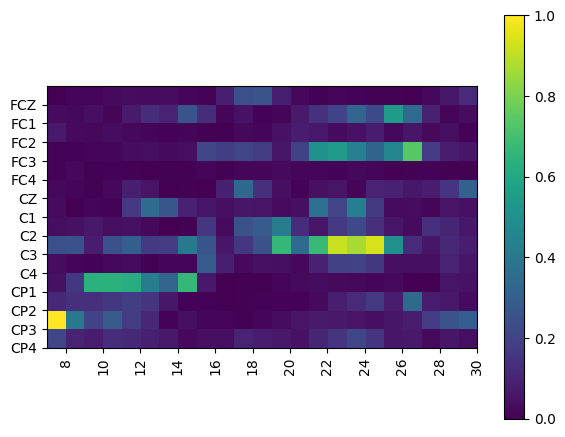

D:/DataSet/MySpaces/data/s08/


AttributeError: 'AxesImage' object has no attribute 'savefig'

In [114]:
fig = plt.plot(figsize=(10,10))
plt.style.use('default')

ch =np.arange(nChannel)+0.5
heatmap = plt.imshow(value_fs)
plt.colorbar()
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.yticks(ch,channelList)
plt.xticks(np.arange(0,len(freq),2)+0.5,freq[::2].astype(int),rotation=90)
fig = plt.show()

# Saving Variable

In [ ]:
feature_dict = dict(channel=channelList,importance=value_fs,freqs=freq)
saving_var('feature_dict',folderSubject,feature_dict)